In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pickle

In [2]:
def get_images(name, size):
    images = np.empty((size, 784))
    numbers = np.empty(size)

    with open(name, 'rt') as file:
        for i in range(size):
            row = file.readline().split(',')

            numbers[i] = row[0]
            images[i] = row[1:]


    return numbers, images

def show_image(image):
    plt.imshow(image.reshape((28,28)), cmap='gray')
    plt.show()

def k_nearest_neighbour(image, numbers, images, k):
    sorted_indices = np.argsort(np.linalg.norm(images-image, axis=-1))
    return Counter(numbers[i] for i in sorted_indices[:k]).most_common(1)[0][0]

In [3]:
# MNIST_train 60000 images
# MNIST_test 10000 images
# MNIST_train_small 3000 images
# MNIST_test_small 1000 images

# 11 seconds for 60000 images
# images = get_images('data/MNIST_train.csv', 60000)
numbers_train_small, images_train_small = get_images('data/MNIST_train_small.csv', 3000)
numbers_test_small, images_test_small = get_images('data/MNIST_test_small.csv', 1000)

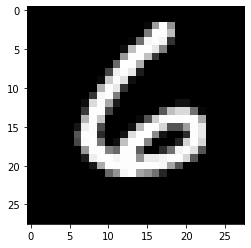

In [4]:
show_image(images_train_small[0])

In [5]:
test_n = len(numbers_test_small)
k_range = 20
result = np.empty((k_range, test_n))

# for k in range(k_range):
#     for i in range(test_n):
#         # result[k-1][i][1] = k_nearest_neighbour(images_test_small[i], numbers_train_small, images_train_small, k+1)
#         result[k][i] = 1

In [6]:
# takes about 10 minutes
with open('result.csv', 'xt') as file:
    for k in range(k_range):
        for i in range(test_n):
            file.write(str(k_nearest_neighbour(images_test_small[i], numbers_train_small, images_train_small, k+1)))
            if i < test_n-1:
                file.write(',')
        file.write('\n')